In [2]:
### batting averages

batting <- read.csv("../../data/batting.csv", header = TRUE)

# $y: empirical means early in the season
# $p: true means (rest of the season)

[1] 0.004187444

[1] 0.001183876

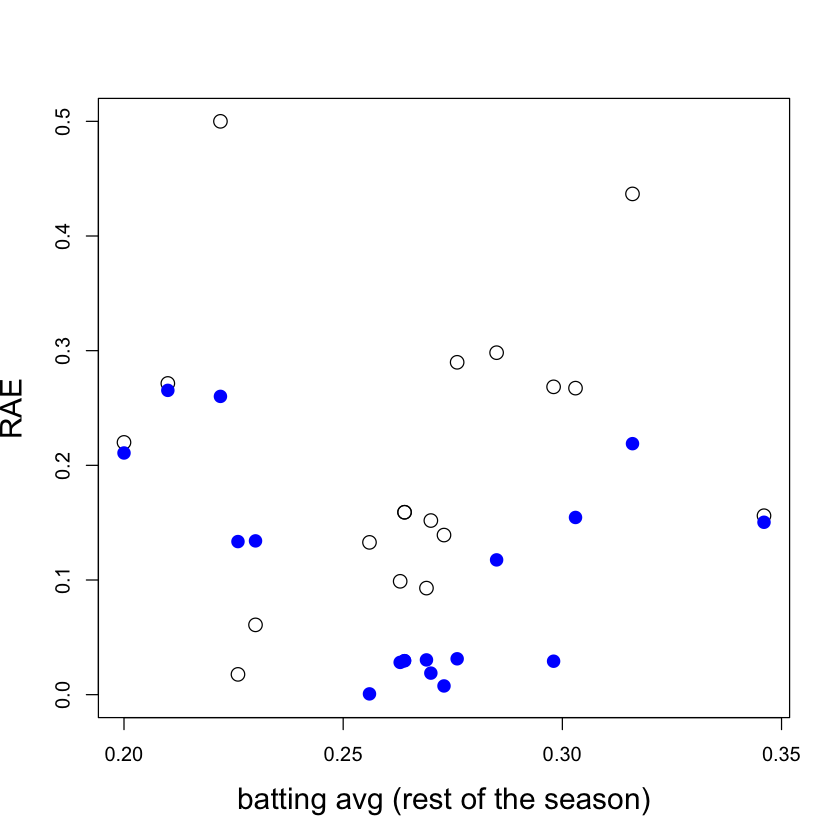

In [3]:
zbar <- mean(batting$y) # grand mean over all players, here used as shrinkage target
ntrials <- 45
sigmasq_hat <- zbar * (1 - zbar) / ntrials #binomial proportion variance estimator
S <- sum((batting$y - zbar)^2)

# This is a modified J-S estimator that accounts for the estimation of the grand mean 
# (cf. p. 71, Eq. 3.168 in the textbook.
muhat <- zbar + (1 - (nrow(batting) - 3)*sigmasq_hat / S) * (batting$y - zbar)

mean((batting$y - batting$p)^2) # MSE, standard mean
mean((muhat - batting$p)^2) # MSE, J-S


# visualization
#pdf("../fig/batting.pdf")
plot(batting$p, abs(batting$p - batting$y)/batting$p, ylim = c(0,0.5),
     xlab = "batting avg (rest of the season)", ylab = "RAE", cex.lab = 1.5, cex = 1.5)
points(batting$p, abs(batting$p - muhat)/batting$p, pch = 16, col = "blue", cex = 1.5)
#dev.off()